In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

ex48

In [5]:
# data for the first few exercises
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([-0.5,0.5,1.5,2.5])


In [6]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))

    def forward(self, x): # We implement the forward pass
        return self.A * x
    
A = 1

model = LinModel(A=A)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
A = 1.0


In [7]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 2.25
Step 500, Loss: 0.3750005066394806
Step 1000, Loss: 0.3749999701976776
Step 1500, Loss: 0.3749999701976776
Step 2000, Loss: 0.3749999701976776
Step 2500, Loss: 0.3749999701976776
Step 3000, Loss: 0.3749999701976776
Step 3500, Loss: 0.3749999701976776
Step 4000, Loss: 0.3749999701976776
Step 4500, Loss: 0.3749999701976776
Step 5000, Loss: 0.3749999701976776
Step 5500, Loss: 0.3749999701976776
Step 6000, Loss: 0.3749999701976776
Step 6500, Loss: 0.3749999701976776
Step 7000, Loss: 0.3749999701976776
Step 7500, Loss: 0.3749999701976776
Step 8000, Loss: 0.3749999701976776
Step 8500, Loss: 0.3749999701976776
Step 9000, Loss: 0.3749999701976776
Step 9500, Loss: 0.3749999701976776
A = 0.5000019669532776


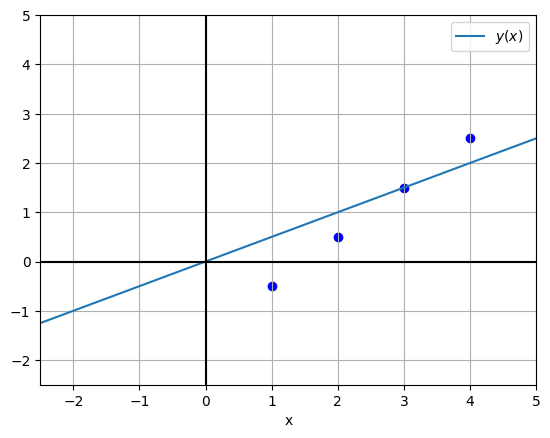

In [8]:
A = 0.5
def lin_func(x,A):
    return A*x

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

In [18]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 5.25
Step 500, Loss: 0.07019560784101486
Step 1000, Loss: 0.05203142762184143
Step 1500, Loss: 0.03856758773326874
Step 2000, Loss: 0.028587706387043
Step 2500, Loss: 0.021190237253904343
Step 3000, Loss: 0.015706943348050117
Step 3500, Loss: 0.01164258923381567
Step 4000, Loss: 0.008629923686385155
Step 4500, Loss: 0.00639681052416563
Step 5000, Loss: 0.0047415741719305515
Step 5500, Loss: 0.0035146214067935944
Step 6000, Loss: 0.0026051716413348913
Step 6500, Loss: 0.00193104799836874
Step 7000, Loss: 0.0014313672436401248
Step 7500, Loss: 0.001060999813489616
Step 8000, Loss: 0.0007864611689001322
Step 8500, Loss: 0.0005829609581269324
Step 9000, Loss: 0.000432122586062178
Step 9500, Loss: 0.00032031763112172484
A = 0.9871755838394165
b = -1.4622949361801147


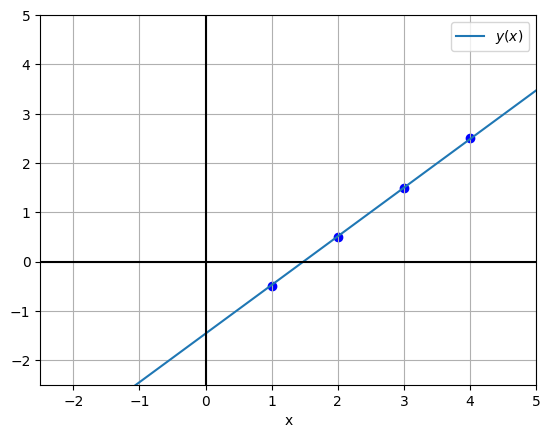

In [20]:
A = 0.9871755838394165
b = -1.4622949361801147
def lin_func(x,A,b):
    return A*x+b

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A,b)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.4 Non-linear data

In [21]:
# next data which is non-linear
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([1,1,1.5,2.5])

In [83]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.A.data.item()
b_plt = model.b.data.item()

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 6.625
Step 500, Loss: 0.1784907430410385
Step 1000, Loss: 0.14847642183303833
Step 1500, Loss: 0.126228928565979
Step 2000, Loss: 0.10973823070526123
Step 2500, Loss: 0.09751472622156143
Step 3000, Loss: 0.08845420181751251
Step 3500, Loss: 0.08173821866512299
Step 4000, Loss: 0.07676007598638535
Step 4500, Loss: 0.07307007908821106
Step 5000, Loss: 0.07033493369817734
Step 5500, Loss: 0.0683075562119484
Step 6000, Loss: 0.06680478155612946
Step 6500, Loss: 0.06569083780050278
Step 7000, Loss: 0.06486520916223526
Step 7500, Loss: 0.06425317376852036
Step 8000, Loss: 0.06379950046539307
Step 8500, Loss: 0.06346326321363449
Step 9000, Loss: 0.06321398168802261
Step 9500, Loss: 0.06302926689386368
A = 0.5164846181869507
b = 0.20153392851352692


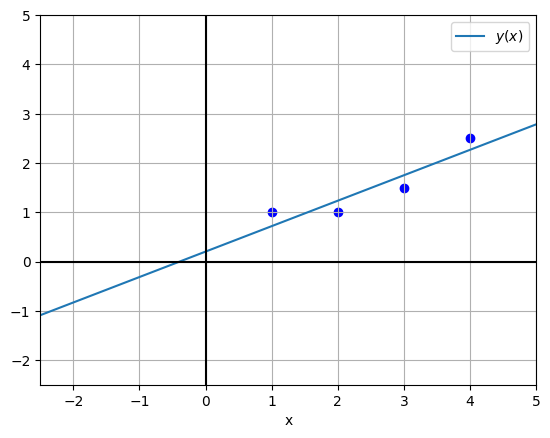

In [84]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.5 Linear model + ReLU

In [95]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLU(torch.nn.Module):
    def __init__(self, w=1.0, b=0.0):
        super().__init__()
        # Define the linear parameters
        self.w = torch.nn.Parameter(torch.tensor(float(w)))  # Weight
        self.b = torch.nn.Parameter(torch.tensor(float(b)))  # Bias

    def forward(self, x):
        # Linear transformation
        h = self.w * x + self.b
        # ReLU activation
        y = torch.relu(h)
        return y
    
w = 1
b = 0

model = NeuronModelWithReLU(w=w, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.w.data.item()
b_plt = model.b.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w = 1.0
b = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.08004893362522125
Step 1000, Loss: 0.07550784200429916
Step 1500, Loss: 0.07214190810918808
Step 2000, Loss: 0.0696469247341156
Step 2500, Loss: 0.06779757887125015
Step 3000, Loss: 0.06642673909664154
Step 3500, Loss: 0.06541063636541367
Step 4000, Loss: 0.06465749442577362
Step 4500, Loss: 0.06409918516874313
Step 5000, Loss: 0.06368540972471237
Step 5500, Loss: 0.06337867677211761
Step 6000, Loss: 0.06315132975578308
Step 6500, Loss: 0.06298279762268066
Step 7000, Loss: 0.06285785138607025
Step 7500, Loss: 0.06276526302099228
Step 8000, Loss: 0.06269662827253342
Step 8500, Loss: 0.06264574825763702
Step 9000, Loss: 0.0626080334186554
Step 9500, Loss: 0.06258010864257812
w = 0.5064135193824768
b = 0.2311452478170395


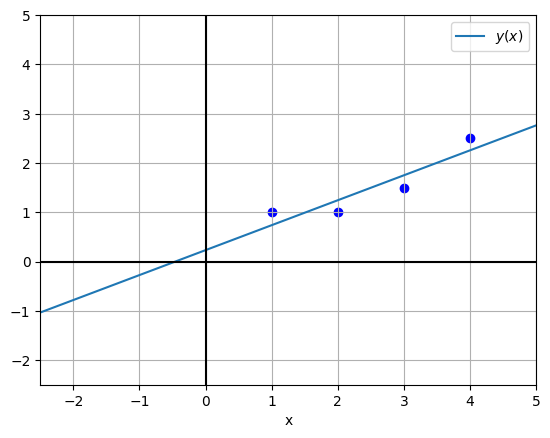

In [96]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

question for TØ: Am I doing this right? I use the parameters A,b that was outputted after training my LinearModel as the weight and bias parameter. I then feed h=w*x+b into ReLU.(h)

4.6 (Linear model + ReLU) × 2

In [98]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLUx2(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias2

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        h2 = self.w2 * a1 + self.b2
        # ReLU activation
        y = torch.relu(h2)

        return y
    
w = 1
b = 0

model = NeuronModelWithReLUx2(w1=w, b1=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.w2.data.item()
b_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.07779781520366669
Step 1000, Loss: 0.07212861627340317
Step 1500, Loss: 0.06863006204366684
Step 2000, Loss: 0.06643667072057724
Step 2500, Loss: 0.06504503637552261
Step 3000, Loss: 0.06415392458438873
Step 3500, Loss: 0.06357923150062561
Step 4000, Loss: 0.0632065162062645
Step 4500, Loss: 0.06296371668577194
Step 5000, Loss: 0.06280498206615448
Step 5500, Loss: 0.06270091980695724
Step 6000, Loss: 0.0626324936747551
Step 6500, Loss: 0.06258752197027206
Step 7000, Loss: 0.06255784630775452
Step 7500, Loss: 0.062538281083107
Step 8000, Loss: 0.06252531707286835
Step 8500, Loss: 0.06251675635576248
Step 9000, Loss: 0.06251111626625061
Step 9500, Loss: 0.06250736117362976
w1 = 0.7039342522621155
b1 = 0.113

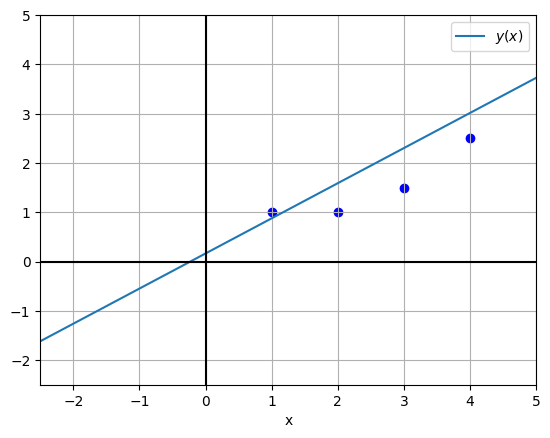

In [100]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

TØ: burde den ikke være non-linear?

4.7 Linear model + ReLU + Linear model

In [101]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLuAndAnotherLinear(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model with some starting values for w and b
w = 1.0
b = 0.0
model = NeuronModelWithReLuAndAnotherLinear(w1=w, b1=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.w2.data.item()
b_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.07779781520366669
Step 1000, Loss: 0.07212861627340317
Step 1500, Loss: 0.06863006204366684
Step 2000, Loss: 0.06643667072057724
Step 2500, Loss: 0.06504503637552261
Step 3000, Loss: 0.06415392458438873
Step 3500, Loss: 0.06357923150062561
Step 4000, Loss: 0.0632065162062645
Step 4500, Loss: 0.06296371668577194
Step 5000, Loss: 0.06280498206615448
Step 5500, Loss: 0.06270091980695724
Step 6000, Loss: 0.0626324936747551
Step 6500, Loss: 0.06258752197027206
Step 7000, Loss: 0.06255784630775452
Step 7500, Loss: 0.062538281083107
Step 8000, Loss: 0.06252531707286835
Step 8500, Loss: 0.06251675635576248
Step 9000, Loss: 0.06251111626625061
Step 9500, Loss: 0.06250736117362976
w1 = 0.7039342522621155
b1 = 0.113

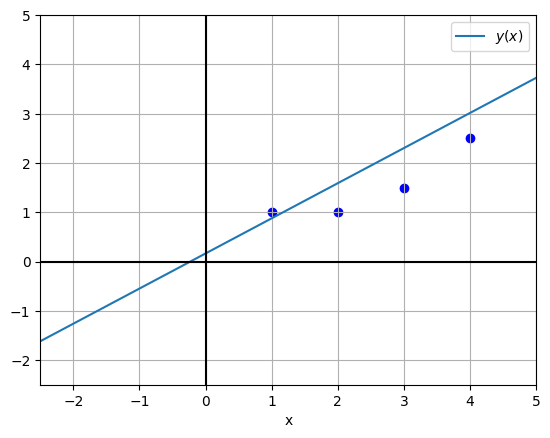

In [102]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot